<a href="https://colab.research.google.com/github/shriju/decision_trees/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text


In [3]:
# load iris datasets

iris = load_iris()

In [4]:
X=iris.data[:, 0:2] # taking only first two features
y = iris.target

In [5]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [9]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [10]:
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8


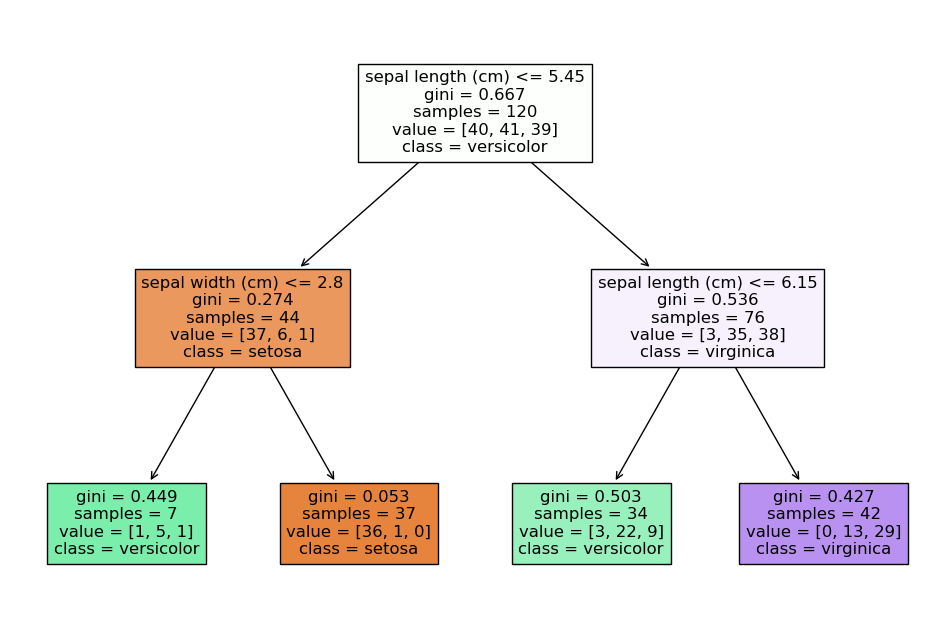

In [11]:
# plot the decision tree
plt.figure(figsize = (12,8))
plot_tree(clf, filled =True, feature_names = iris.feature_names[:2], class_names=iris.target_names)
plt.show()

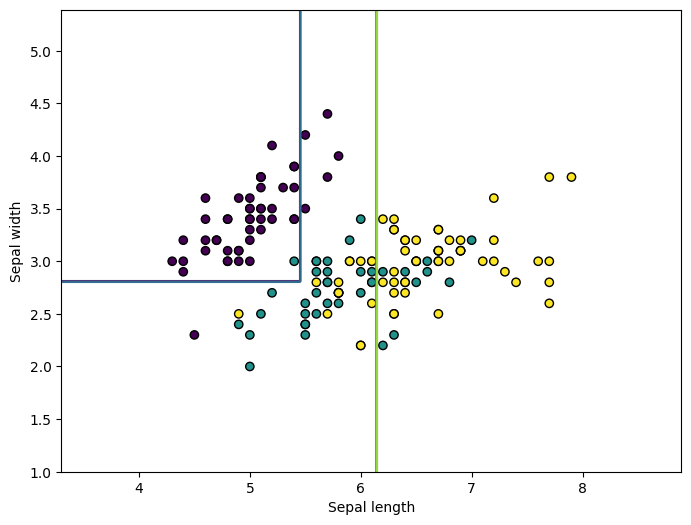

In [13]:
# plot the decision boundry
plt.figure(figsize=(8,6))
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
z= z.reshape(xx.shape)

plt.contour(xx, yy, z, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor = 'k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


In [14]:
r = export_text(clf, feature_names=['sepal_length', 'sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2

